In [42]:

## Importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
from warnings import filterwarnings
from datetime import datetime
import os
import json
filterwarnings("ignore")

#Iteration
import itertools

#Clustering Libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

#for Text Mining
import re 
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import WordNetLemmatizer 
import nltk 
from nltk.corpus import inaugural
from nltk.draw.dispersion import dispersion_plot
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score,recall_score,precision_score

# Declaring this to show graphs after inline command instead of plt.show() after every instance of plotting
%matplotlib inline

#Set the max number of rows in output cell to 30
pd.options.display.max_rows = 30


#Ignore unnecessary warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [43]:
data_directory = "Docments Clustering\Text Docs"
# categories = ["business", "food","medical","space"]
categories = ["business", "food","medical","space","sport","entertainment","historical","graphics","politics"]  # Add or remove based on your categories

documents = []
labels = []

for category in categories:
    category_path = os.path.join(data_directory, category)
    for filename in os.listdir(category_path):
        if filename.endswith(".txt"):
            filepath = os.path.join(category_path, filename)
            with open(filepath, 'r', encoding='utf-8') as file:
                content = file.read()
                documents.append(content)
                labels.append(category)

In [44]:
documents

['German bidder in talks with LSE\n\nDeutsche Boerse bosses have held "constructive, professional and friendly" talks with the London Stock Exchange (LSE), its chief has said.\n\nWerner Seifert met LSE chief executive Clara Furse amid rumours the German group may raise its bid to £1.5bn ($2.9bn) from its initial £1.3bn offer. However, rival suitor Euronext also upped the ante in the bid battle. Ahead of talks with the LSE on Friday, the pan-European bourse said it may be prepared to make its offer in cash. The Paris-based exchange, owner of Liffe in London, is reported to be ready to raise £1.4bn to fund a bid.\n\nThe news came as Deutsche Boerse held its third meeting with the LSE since its bid approach in December which was turned down by the London exchange for undervaluing the business. However, the LSE did agree to leave the door open for talks to find out whether a "significantly-improved proposal" would be in the interests of LSE\'s shareholders and customers. In the meantime, E

In [45]:
# Text Preprocessing: Tokenize -> Clean -> Remove Stop words -> Lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(doc):
    #Tokenize the text first
    tokens = nltk.word_tokenize(doc)
    #Clean for special charecters and then convert enter text to lowercase
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(tokens)

In [46]:
processed_docs = [preprocess(doc) for doc in documents]
labels = [label for label in labels]

In [47]:
# Step 3: Feature Extraction/ Vectorization
# BoW
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(processed_docs)

# N-grams
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3)) # unigrams + bigrams +trigrams
X_ngram = ngram_vectorizer.fit_transform(processed_docs)

# TF-TDF
tf_idf_vectorizer = TfidfVectorizer()
X_tf = tf_idf_vectorizer.fit_transform(processed_docs)

In [48]:
#Analysis of Optinmal number of clusters 
#Sum of Squares
wss = []
for i in range(1,12):
    KM = KMeans(n_clusters = i, init='k-means++', max_iter=200, n_init=10)
    KM.fit(X_tf)
    wss.append(KM.inertia_)
    
#Silhoutte Score
sil_score = []
for i in range(2,12):
    SL = KMeans(n_clusters = i, init='k-means++', max_iter=200, n_init=10)
    SL.fit(X_tf)
    score = silhouette_score(X_tf,SL.labels_)
    sil_score.append(score)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

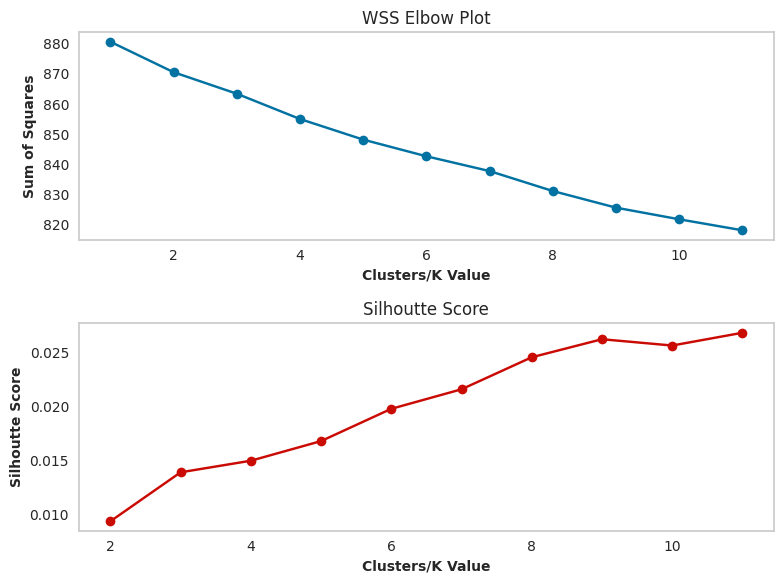

In [49]:
#plot the scores
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.title('WSS Elbow Plot')

plt.plot(range(1,12),wss,'o-');

plt.xlabel('Clusters/K Value', fontsize=10, weight='bold');
plt.ylabel('Sum of Squares', fontsize=10, weight='bold');
plt.grid();

#plot for Silhoutte
plt.subplot(2,1,2)
plt.title('Silhoutte Score')

plt.plot(range(2,12),sil_score,'ro-');

plt.xlabel('Clusters/K Value', fontsize=10, weight='bold');
plt.ylabel('Silhoutte Score', fontsize=10, weight='bold');
plt.grid();

plt.tight_layout();

In [50]:
#Checking Distribution
K_val = 8
KM_dist = KMeans(n_clusters = K_val, init='k-means++', max_iter=200, n_init=10)
KM_dist.fit(X_tf);
KM_dist_labels = KM_dist.labels_

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

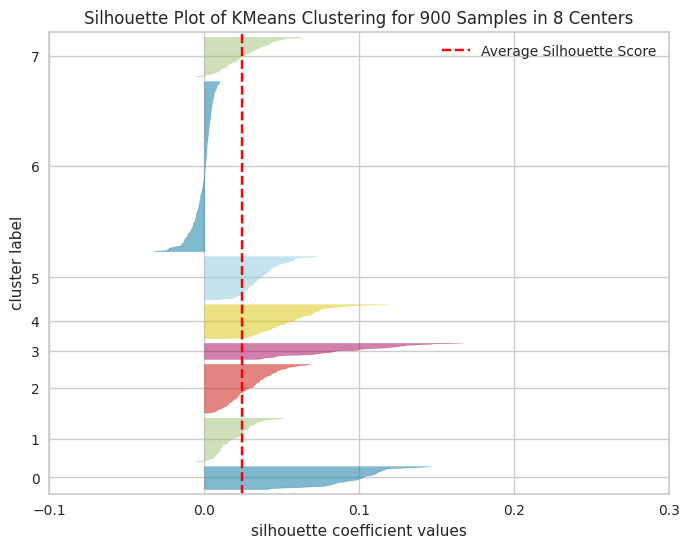

In [51]:
plt.figure(figsize=(8,6))
vis = SilhouetteVisualizer(KM_dist, colors = 'yellowbrick');
vis.fit(X_tf);
vis.show();

In [52]:
result={'cluster':KM_dist_labels,'Docs':documents}
result = pd.DataFrame(result)
result

cluster                                               Docs
0          1  German bidder in talks with LSE\n\nDeutsche Bo...
1          6  Cash gives way to flexible friend\n\nSpending ...
2          2  McDonald's boss Bell dies aged 44\n\nCharlie B...
3          1  German economy rebounds\n\nGermany's economy, ...
4          1  M&S cuts prices by average of 24%\n\nMarks & S...
..       ...                                                ...
895        2  Prime minister's questions\n\nSo who, if anyon...
896        2  New UKIP defection to 'Veritas'\n\nThe UK Inde...
897        2  Ministers lose slopping out case\n\nThe Scotti...
898        2  Schools to take part in mock poll\n\nRecord nu...
899        2  Peers debate Crown succession law\n\nPeers are...

[900 rows x 2 columns]

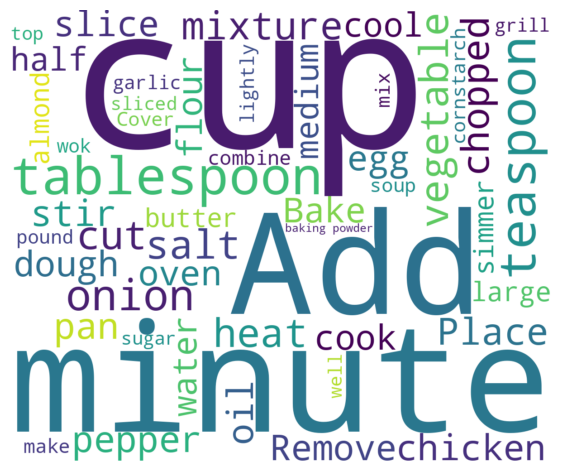

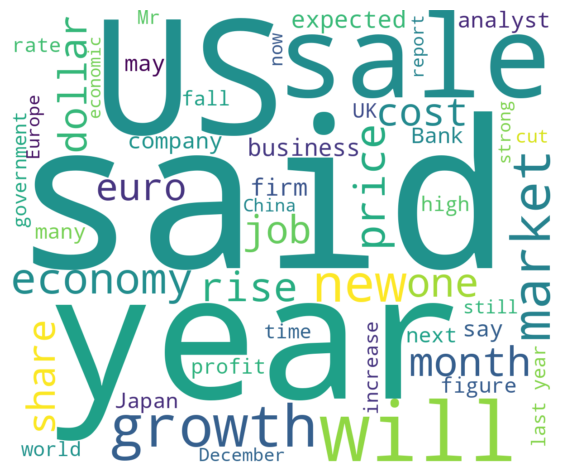

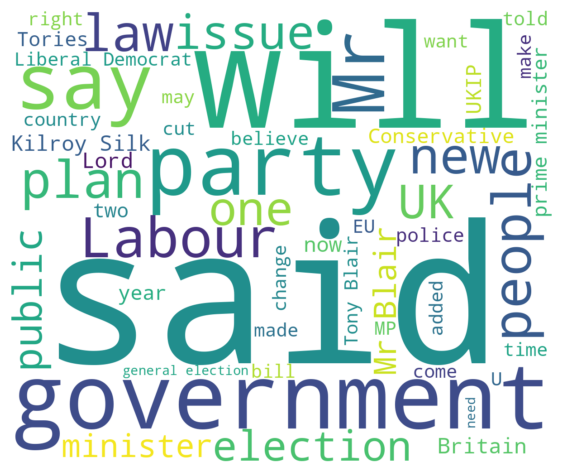

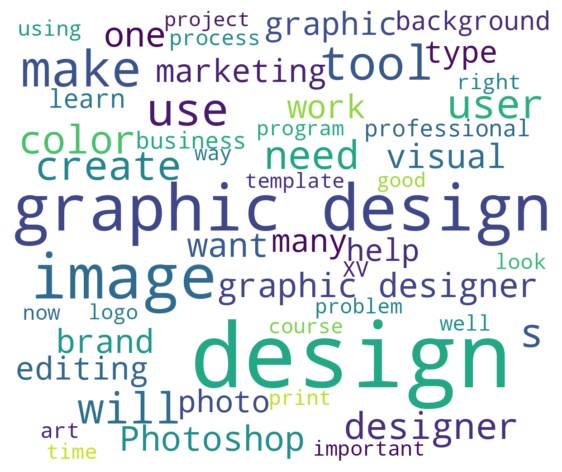

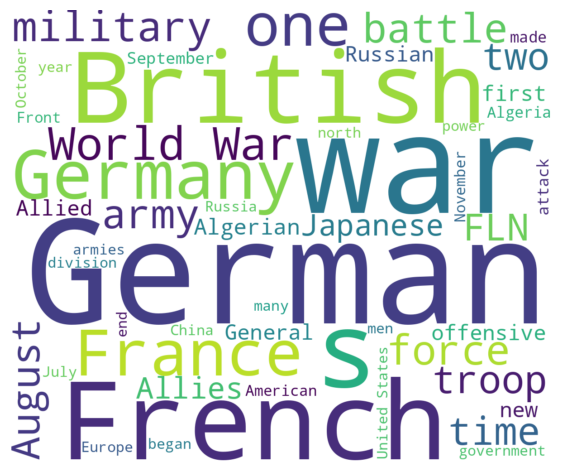

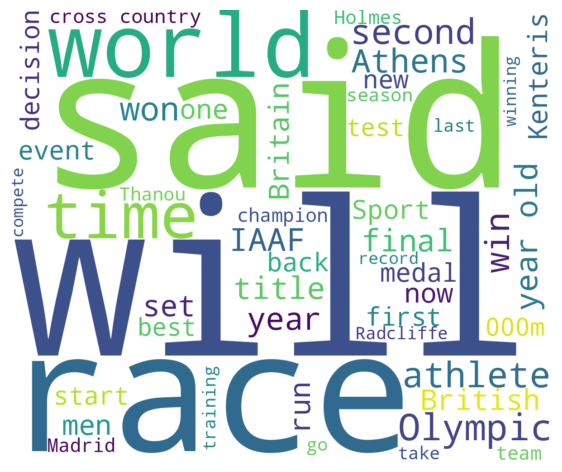

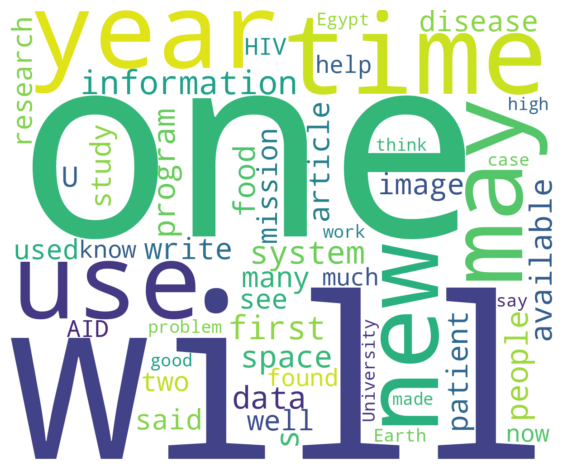

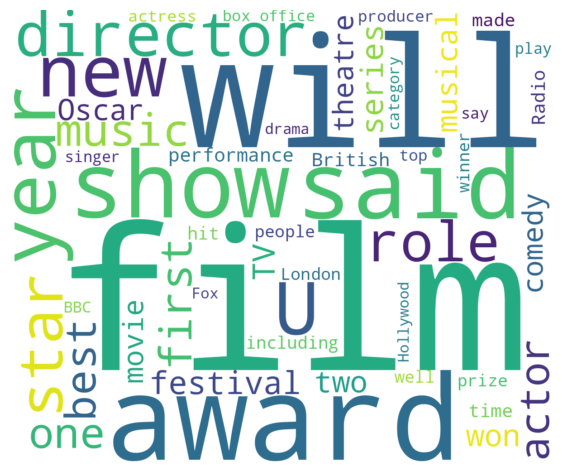

In [57]:
for k in range(0,K_val):
    s = result[result.cluster == k]
    text=s['Docs']
    # text=s['Docs'].str.cat(sep=' ')
    # text=text.lower()
    # text=' '.join([word for word in text.split()])
    # new_words = set(STOPWORDS)
    plt.subplots (figsize=(7,7))
    wordcloud = WordCloud(background_color='white',max_words=50,
                                width=1200,stopwords=new_words ,
                                height=1000).generate(" ".join(text))

    # plt.title("MOST USED WORDS",fontsize=20)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()